
# Linear Regression with Python

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

**Let's get started!**
## Check out the data
We've been able to get some data from your neighbor for housing prices as a csv set, let's get our environment ready with the libraries we'll need and then import the data!
### Import Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Check out the Data

In [43]:
#reaifn the data
USAhousing = pd.read_csv('/home/sakil/Desktop/DataScienceCourse_DTU/USA_Housing.csv')

In [44]:
USAhousing.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [45]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [46]:
USAhousing.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [47]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [48]:
USAhousing.shape

(5000, 7)

In [49]:
data=USAhousing.copy()

In [50]:
#checking the null values
data.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [51]:
#checking the null values
data.isna().sum()
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

# EDA

Let's create some simple plots to check out the data!

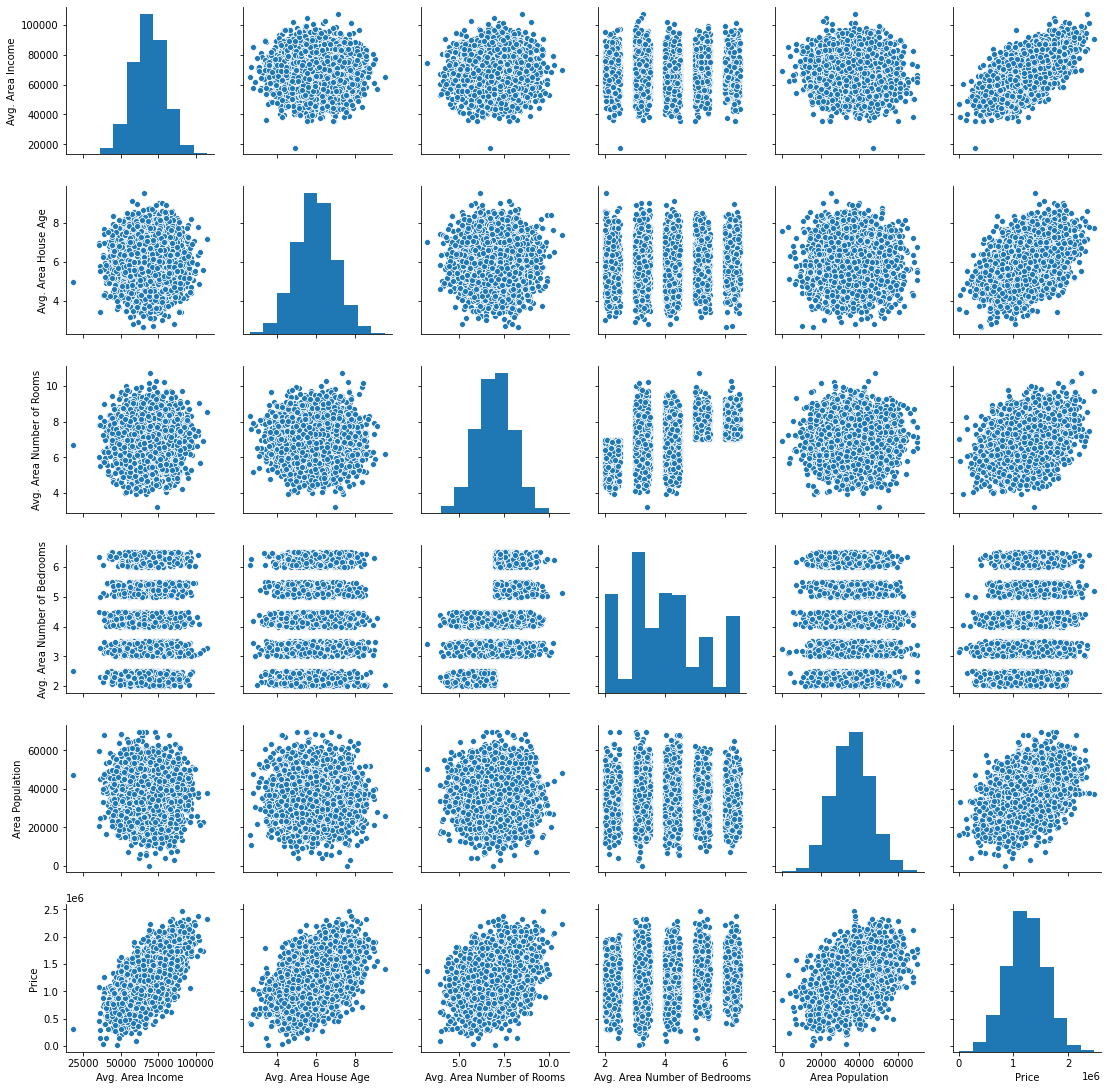

In [52]:
sns.pairplot(USAhousing)

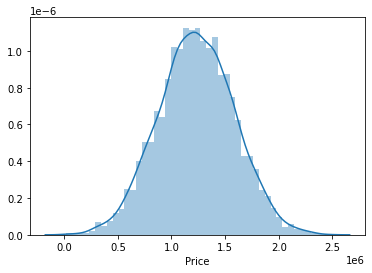

In [21]:
sns.distplot(USAhousing['Price'])

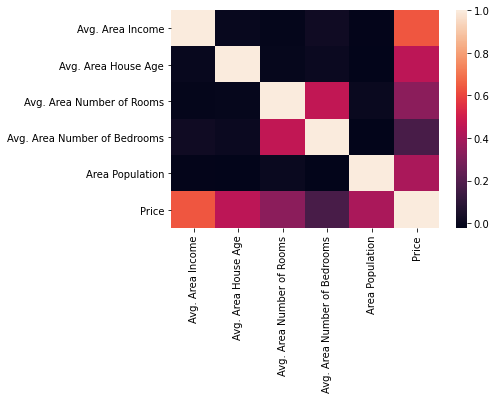

In [22]:
sns.heatmap(USAhousing.corr())

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [53]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age']]
y = USAhousing['Price']

In [53]:
type(fittedY)

numpy.ndarray

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [34]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lm = LinearRegression()

In [57]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lm,X,y,cv=5)

In [59]:
score

array([0.62648374, 0.65669586, 0.56870865, 0.62162335, 0.58861328])

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [41]:
# print the intercept
print(lm.intercept_)

-1176862.4732176051


In [27]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Avg. Area Income         20.974469
Avg. Area House Age  162484.383348

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

Does this make sense? Probably not because I made up this data. If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [28]:
predictions = lm.predict(X_test)

In [30]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1776    1.489520e+06
4269    7.777336e+05
1661    1.515271e+05
2410    1.343824e+06
2302    1.906025e+06
Name: Price, Length: 2000, dtype: float64

In [31]:
import matplotlib
print(matplotlib.__version__)

3.2.1


In [32]:
x_surf

NameError: name 'x_surf' is not defined

1718    66774.995817
2511    62184.539375
345     73643.057298
2521    61909.041438
54      72942.705059
2866    64714.524162
2371    72827.490790
2952    54618.236245
45      66394.871586
4653    62816.878372
891     73591.488886
3011    60842.804450
335     84963.663408
3050    65075.857756
3850    71108.053967
834     74727.888573
3188    63242.151272
4675    64927.647964
2564    67535.207570
1866    68450.262416
1492    51962.161241
3720    74372.294856
618     76933.606108
3489    61641.151657
2145    66374.687333
3200    77545.925694
4752    87595.602798
602     66733.631811
4665    63057.694615
79      64419.252638
            ...     
3391    66894.116950
4975    54037.580879
2156    85048.195867
4206    96550.998883
3903    68099.653438
2685    59289.684790
2439    61611.751784
3595    79632.264928
1679    63049.974888
1102    80040.173315
1260    57327.988592
1924    85337.551600
4545    65694.051265
1525    61321.589364
529     50189.140796
3804    61601.580593
1763    52699

In [33]:
plt.scatter(y_test,predictions)

**Residual Histogram**

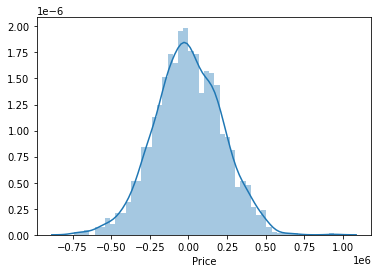

In [34]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [35]:
from sklearn import metrics

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 172548.73873406457
MSE: 47127723506.06781
RMSE: 217089.206332484


This was your first real Machine Learning Project! Congrats on helping your neighbor out! We'll let this end here for now, but go ahead and explore the Boston Dataset mentioned earlier if this particular data set was interesting to you! 



In [37]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [38]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=10)

In [39]:
score

array([0.09496113, 0.20973241, 0.24567257, 0.24865094, 0.20328997,
       0.12803591, 0.18606766, 0.23545361, 0.19916443, 0.17844521])

In [40]:
score.mean()

0.1929473844504544

In [41]:
from sklearn.ensemble import RandomForestRegressor


/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [42]:
regressor1=RandomForestRegressor(100)

In [43]:
score1=cross_val_score(regressor1,X,y,cv=10)

In [44]:
score1

array([0.48440954, 0.56474341, 0.58115505, 0.55509195, 0.51134072,
       0.46246724, 0.52272449, 0.53915661, 0.50657813, 0.49306466])

In [45]:
score1.mean()

0.522073180768018